<a href="https://colab.research.google.com/github/DGkurnia/discuss1/blob/main/hint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Muhammad Danish A.**

**Email : dnshconquer@gmail.com**

**domisili : Jakarta Barat**

In [ ]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [ ]:
import os
import zipfile

target = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(target, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os

# membuat path ke masing2 directory

img_scissors = os.path.join('rockpaperscissors/scissors')
img_paper = os.path.join('rockpaperscissors/paper')
img_rock = os.path.join('rockpaperscissors/rock')

# itung dlu siapa tau kurang

print('jumlah gunting', len(os.listdir(img_scissors)))
print('jumlah kertas', len(os.listdir(img_paper)))
print('jumlah batu', len(os.listdir(img_rock)))

# bagi2 dataset




jumlah gunting 750
jumlah kertas 712
jumlah batu 726


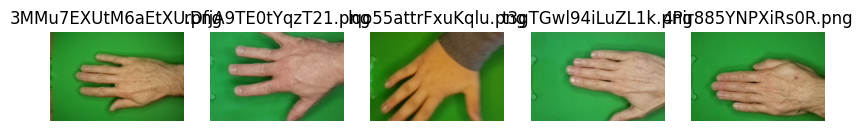

In [ ]:
# tunjukkan gambarmu paklek

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

ROWS = 4
COLS = 4

# IMG_INDEX = 0


# Path ke folder gambar
# folder_path = 'path/to/your/folder'

# Mendapatkan daftar file gambar
image_files = [f for f in os.listdir(img_paper) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

# Menampilkan 5 gambar pertama dalam satu plot
plt.figure(figsize=(10, 10))  # Ukuran plot

for i, image_file in enumerate(image_files[:5]):  # Loop untuk 5 gambar pertama
    img_path = os.path.join(img_paper, image_file)
    img = mpimg.imread(img_path)

    plt.subplot(1, 5, i + 1)  # Membuat 5 kolom (1 baris, 5 kolom)
    plt.imshow(img)
    plt.title(image_file)
    plt.axis('off')  # Menyembunyikan axis

plt.show()  # Menampilkan semua gambar sekaligus


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Origin_dir = 'rockpaperscissors/rps-cv-images'

train_image = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
    zoom_range=0.2,
    validation_split=0.4 #menerapkan Validation split ygy
)

# buat data training

train_generator = train_image.flow_from_directory(
    Origin_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_image.flow_from_directory(
    Origin_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
IMG_WIDTH = 150
IMG_HEIGHT = 150

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,035,203 (72.61 MB)

 Trainable params: 19,035,203 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
EPOCHS = 10

history = model.fit(
    validation_generator,
    steps_per_epoch=validation_generator.samples//32,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.9225 - loss: 0.1880 - val_accuracy: 0.9537 - val_loss: 0.1270
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9375 - loss: 0.1307 - val_accuracy: 0.8000 - val_loss: 0.2609
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.9547 - loss: 0.1287 - val_accuracy: 0.9444 - val_loss: 0.1233
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9062 - loss: 0.2297 - val_accuracy: 0.9000 - val_loss: 0.2107
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.9356 - loss: 0.1892 - val_accuracy: 0.9468 - val_loss: 0.1524
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9375 - loss: 0.2379 - val_accuracy: 1.0000 - val_loss: 0.0381
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.9612 - loss: 0.1179 - val_accuracy: 0.9780 - val_loss: 0.0732
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 1.0000 - loss: 0.0630 - val_accuracy: 1.0000 - val_los

In [ ]:
# Evaluation Party

if history.history.get('val_loss') is not None:
  loss, accuracy = model.evaluate(validation_generator)
  print(f'Loss: {loss}, Accuracy: {accuracy}')
else :
  print('No validation data available for evaluation.')

28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 714ms/step - accuracy: 0.9805 - loss: 0.0818
Loss: 0.07893989980220795, Accuracy: 0.9748283624649048


In [ ]:
model.save('danxhmodelv1,3.h5')

Saving images.jpeg to images (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


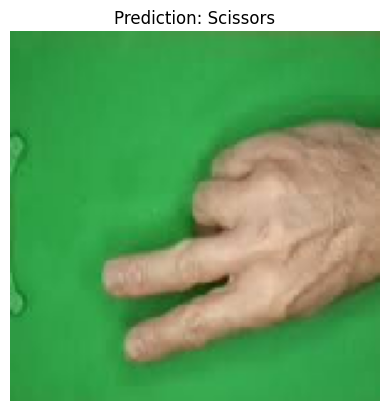

In [ ]:
from google.colab import files
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image


model = tf.keras.models.load_model('danxhmodelv1,3.h5')

# Fungsi untuk mengunggah gambar
def upload_and_predict(model):
    uploaded = files.upload()

    for fn in uploaded.keys():
        # Path ke file yang diunggah
        path = fn
        img = image.load_img(path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0

        # Prediksi gambar
        predictions = model.predict(img_array)
        class_names = ['Rock', 'Paper', 'Scissors']
        predicted_class = class_names[np.argmax(predictions)]

        # Tampilkan gambar dan prediksi
        plt.imshow(img)
        plt.title(f"Prediction: {predicted_class}")
        plt.axis('off')
        plt.show()

# Unggah dan prediksi gambar
upload_and_predict(model)